**Table of contents**<a id='toc0_'></a>    
- [DATA PROCESSING](#toc1_)    
- [FEATURE SELECTION](#toc2_)    
  - [Verstack](#toc2_1_)    
  - [Forward Selection](#toc2_2_)    
- [AUTO ML](#toc3_)    
  - [Lazy Predictor](#toc3_1_)    
  - [H20](#toc3_2_)    
- [Conclusions concerning credit spend as derived from provided data:](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [267]:
#CREDIT CARD SPEND PREDICTION

In [268]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,f1_score,average_precision_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
import itertools
%matplotlib inline

In [269]:
#Importing dataset as "data"
data=pd.read_csv("Data/CREDIT CARD USERS DATA.csv")
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.00,2.00,1.00,20.00,2.00,September,15.00,3.00,1.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
1,0648-AIPJSP-UVM,5.00,5.00,0.00,22.00,2.00,May,17.00,4.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
2,5195-TLUDJE-HVO,3.00,4.00,1.00,67.00,6.00,June,14.00,2.00,2.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,4459-VLPQUH-3OL,4.00,3.00,0.00,23.00,2.00,May,16.00,3.00,2.00,...,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
4,8158-SMTQFB-CNO,2.00,2.00,0.00,26.00,3.00,July,16.00,3.00,2.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [270]:
#Importing Data Dictionary as "dictionary"
dictionary=pd.read_excel("CREDIT CARD USERS DATA.xlsx","Data Dictionary")

In [271]:
#Defining Categorical Variables as "catvars"
catvars=dictionary[dictionary['Categorical Variable'].isnull()==False]['Categorical Variable']

In [272]:
data[catvars].head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.00,2.00,1.00,2.00,September,3.00,1.00,1.00,0.00,1.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
1,5.00,5.00,0.00,2.00,May,4.00,2.00,0.00,0.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
2,3.00,4.00,1.00,6.00,June,2.00,2.00,0.00,16.00,5.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,4.00,3.00,0.00,2.00,May,3.00,2.00,0.00,0.00,1.00,...,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
4,2.00,2.00,0.00,3.00,July,3.00,2.00,0.00,1.00,1.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [273]:
#Replacing the #NULL! values with NaN values
for i in data.columns:
    data[i]=data[i].replace('#NULL!',np.nan)

In [274]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.00,2.00,1.00,20.00,2.00,September,15.00,3.00,1.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
1,0648-AIPJSP-UVM,5.00,5.00,0.00,22.00,2.00,May,17.00,4.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
2,5195-TLUDJE-HVO,3.00,4.00,1.00,67.00,6.00,June,14.00,2.00,2.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,4459-VLPQUH-3OL,4.00,3.00,0.00,23.00,2.00,May,16.00,3.00,2.00,...,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
4,8158-SMTQFB-CNO,2.00,2.00,0.00,26.00,3.00,July,16.00,3.00,2.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


In [276]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.00,3.00,1.42,1.00,2.00,3.00,4.00,5.00
gender,5000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
age,5000.00,47.03,17.77,18.00,31.00,47.00,62.00,79.00
agecat,5000.00,4.24,1.31,2.00,3.00,4.00,5.00,6.00
ed,5000.00,14.54,3.28,6.00,12.00,14.00,17.00,23.00
...,...,...,...,...,...,...,...,...
ownfax,5000.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
news,5000.00,0.47,0.50,0.00,0.00,0.00,1.00,1.00
response_01,5000.00,0.08,0.28,0.00,0.00,0.00,0.00,1.00
response_02,5000.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00


In [277]:
#Counting the number of NULL values
data.isnull().sum().sort_values(ascending=False)

lnwireten      3656
lnwiremon      3656
lnequipten     3296
lnequipmon     3296
lntollten      2622
               ... 
cars              0
addresscat        0
address           0
hometype          0
response_03       0
Length: 132, dtype: int64

In [278]:
#Removing columns with containing major percentage of values missing
data.drop(['lnwireten','lnwiremon','lnequipmon','lnequipten','lntollten','lntollmon'],axis=1,inplace=True)

In [279]:
#Counting the number of NULL values
data.isnull().sum().sort_values(ascending=False)

lncardten      1422
lncardmon      1419
longten           3
lnlongten         3
cardten           2
               ... 
addresscat        0
address           0
hometype          0
homeown           0
response_03       0
Length: 126, dtype: int64

In [280]:
#Counting the number of NULL values
data.isnull().sum().sort_values(ascending=False)

lncardten      1422
lncardmon      1419
longten           3
lnlongten         3
cardten           2
               ... 
addresscat        0
address           0
hometype          0
homeown           0
response_03       0
Length: 126, dtype: int64

In [281]:
data.index=data.custid
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,3964-QJWTRG-NPN,1.00,2.00,1.00,20.00,2.00,September,15.00,3.00,1.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
0648-AIPJSP-UVM,0648-AIPJSP-UVM,5.00,5.00,0.00,22.00,2.00,May,17.00,4.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
5195-TLUDJE-HVO,5195-TLUDJE-HVO,3.00,4.00,1.00,67.00,6.00,June,14.00,2.00,2.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4459-VLPQUH-3OL,4459-VLPQUH-3OL,4.00,3.00,0.00,23.00,2.00,May,16.00,3.00,2.00,...,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00
8158-SMTQFB-CNO,8158-SMTQFB-CNO,2.00,2.00,0.00,26.00,3.00,July,16.00,3.00,2.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [282]:
data.drop(columns={'custid'},axis=1,inplace=True)

# <a id='toc1_'></a>[DATA PROCESSING](#toc0_)

In [283]:
#Extracting our required variable
reqvar=data['cardspent']+data['card2spent']
reqvar=reqvar.rename("reqvar")
data=data.join(reqvar)
data.drop(columns={'cardspent','card2spent'},inplace=True)
data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.00,2.00,1.00,20.00,2.00,September,15.00,3.00,1.00,1.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,149.46
0648-AIPJSP-UVM,5.00,5.00,0.00,22.00,2.00,May,17.00,4.00,2.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,77.54
5195-TLUDJE-HVO,3.00,4.00,1.00,67.00,6.00,June,14.00,2.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,359.97
4459-VLPQUH-3OL,4.00,3.00,0.00,23.00,2.00,May,16.00,3.00,2.00,0.00,...,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,359.41
8158-SMTQFB-CNO,2.00,2.00,0.00,26.00,3.00,July,16.00,3.00,2.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,507.83


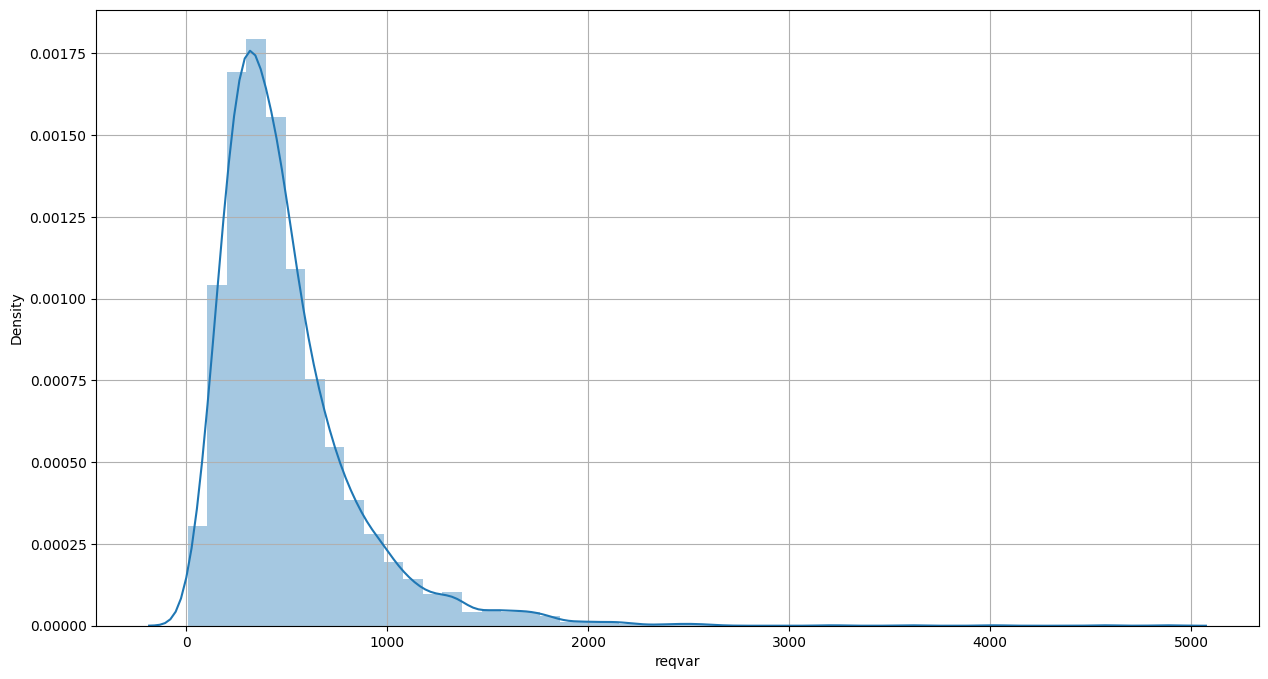

In [285]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

In [286]:
data['reqvar']=np.log(data['reqvar'])

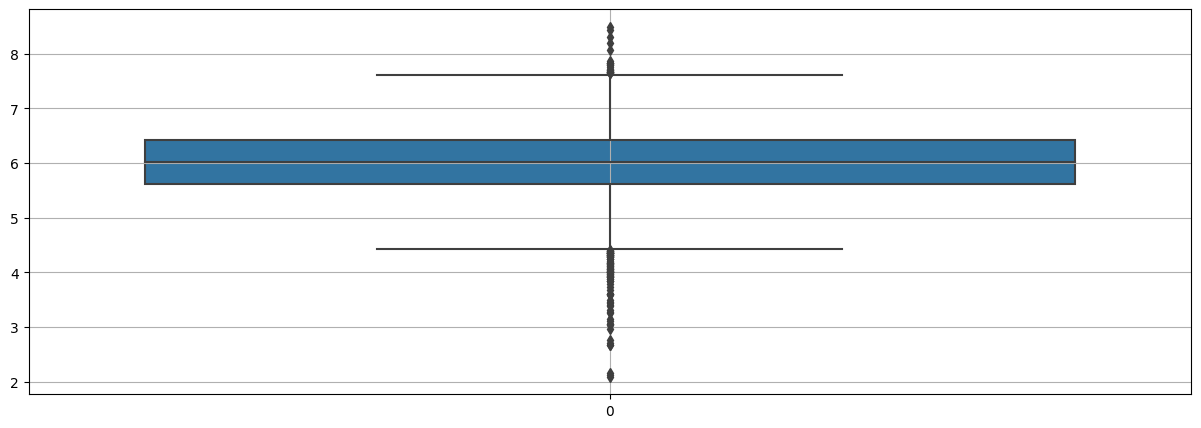

In [287]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

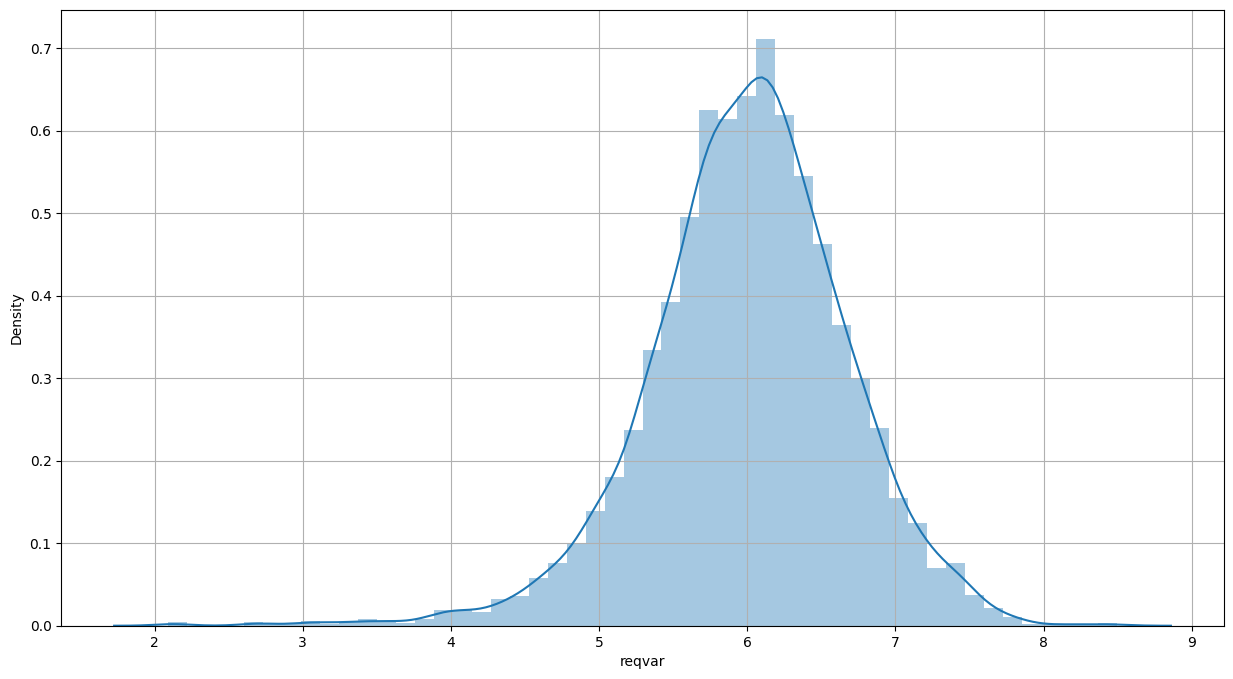

In [288]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

In [289]:
numvars=data.drop(columns=catvars,axis=1)
numvars.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,equipmon,equipten,cardmon,lncardmon,cardten,lncardten,wiremon,wireten,hourstv,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.00,15.00,31.00,3.43,11.10,1.20,0.18,2.24,0.81,-1.00,...,29.50,126.10,14.25,2.66,60.00,4.09,0.00,0.00,13.00,5.01
0648-AIPJSP-UVM,22.00,17.00,15.00,2.71,18.60,1.22,0.20,1.57,0.45,-1.00,...,54.85,1975.00,16.00,2.77,610.00,6.41,45.65,1683.55,18.00,4.35
5195-TLUDJE-HVO,67.00,14.00,35.00,3.56,9.90,0.93,-0.07,2.54,0.93,13.00,...,0.00,0.00,23.00,3.14,1410.00,7.25,0.00,0.00,21.00,5.89
4459-VLPQUH-3OL,23.00,16.00,20.00,3.00,5.70,0.02,-3.78,1.12,0.11,18.00,...,0.00,0.00,21.00,3.04,685.00,6.53,0.00,0.00,26.00,5.88
8158-SMTQFB-CNO,26.00,16.00,23.00,3.14,1.70,0.21,-1.54,0.18,-1.74,13.00,...,0.00,0.00,17.25,2.85,360.00,5.89,19.05,410.80,27.00,6.23


In [290]:
q1=numvars.quantile(0.25)
q3=numvars.quantile(0.75)
x=q3-q1
lower=q1-(1.5*x)
upper=q3+(1.5*x)

In [291]:
nums=list()
for i in numvars.columns:
    if i in lower.index:
        nums.append(i)

In [292]:
numvars=numvars[nums]

In [293]:
df=numvars[~((numvars<(q1-1.5 *x)) | (numvars>(q3+1.5*x))).any(axis=1)]
df.head()

,age,ed,income,lninc,debtinc,creddebt,othdebt,spoused,reside,pets,...,lnlongmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten,hourstv,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.00,15.00,31.00,3.43,11.10,1.20,2.24,-1.00,3.00,0.00,...,1.87,29.00,161.05,29.50,126.10,14.25,0.00,0.00,13.00,5.01
4459-VLPQUH-3OL,23.00,16.00,20.00,3.00,5.70,0.02,1.12,18.00,5.00,0.00,...,1.79,0.00,0.00,0.00,0.00,21.00,0.00,0.00,26.00,5.88
9124-DZALHM-S6I,66.00,12.00,16.00,2.77,2.60,0.10,0.31,-1.00,1.00,1.00,...,3.05,0.00,0.00,0.00,0.00,15.50,0.00,0.00,25.00,6.15
3512-MUWBGY-52X,47.00,11.00,84.00,4.43,4.10,1.77,1.67,-1.00,2.00,1.00,...,1.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.00,5.74
8241-PWPONH-62O,33.00,8.00,19.00,2.94,0.90,0.13,0.04,9.00,5.00,6.00,...,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27.00,5.97


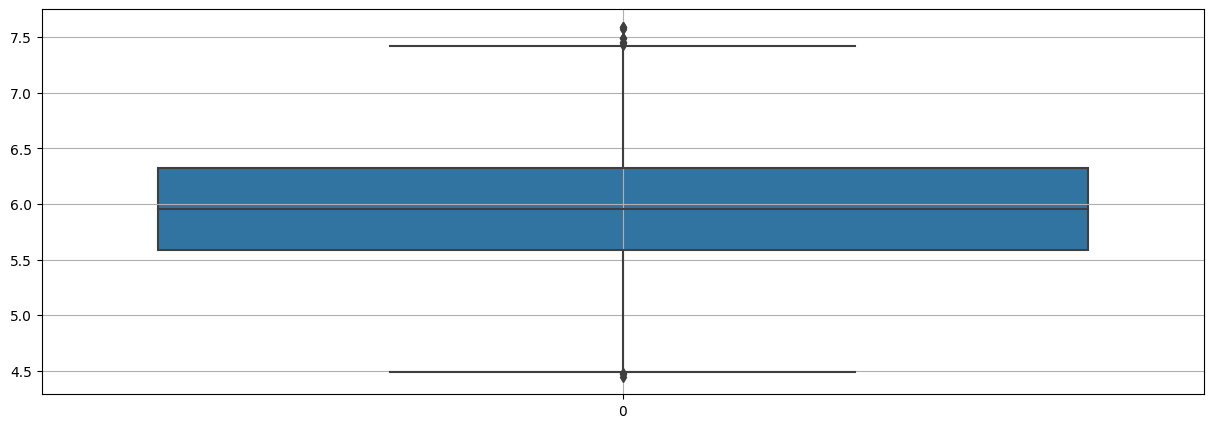

In [294]:
#Post the treatment of outlier and log transform
plt.subplots(figsize=(15,5))
sns.boxplot(df['reqvar'])
plt.grid()
plt.show()

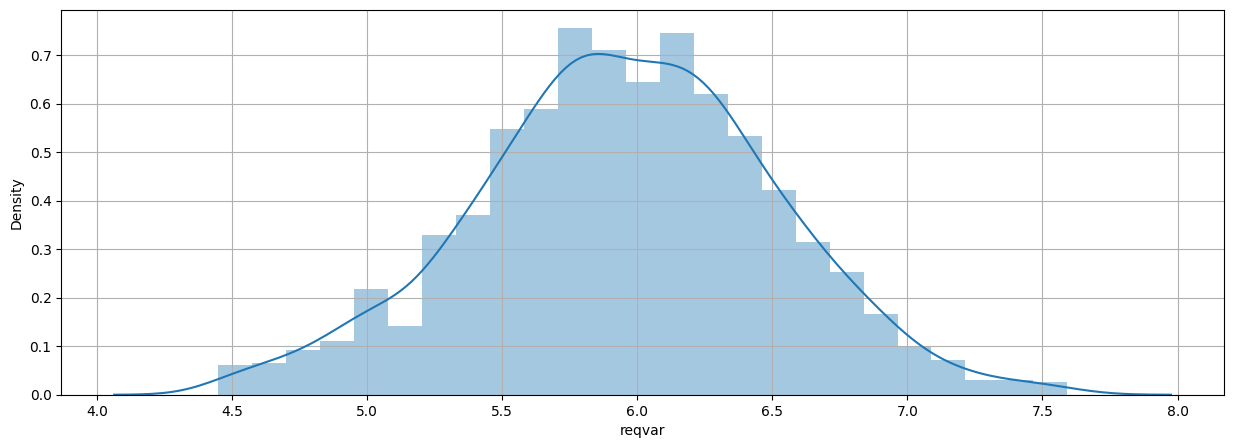

In [295]:
plt.subplots(figsize=(15,5))
sns.distplot(df['reqvar'])
plt.grid()
plt.show()

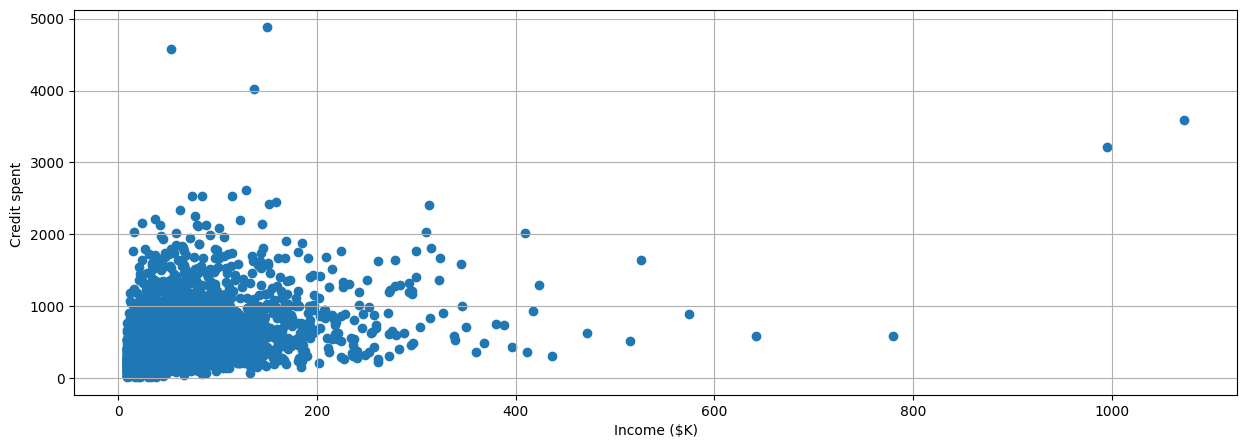

In [296]:
plt.subplots(figsize=(15,5))
plt.scatter(data['income'],reqvar)
plt.xlabel('Income ($K)')
plt.ylabel('Credit spent ')
plt.grid()
plt.show()

In [342]:
#Quantile Analysis

In [343]:
q1=numvars.quantile(0.10)
numvars[numvars[q1.index]<q1].describe().T

,count,mean,std,min,25%,50%,75%,max
age,441.00,19.93,1.45,18.00,19.00,20.00,21.00,22.00
ed,324.00,8.40,0.76,6.00,8.00,9.00,9.00,9.00
income,462.00,12.10,2.16,9.00,10.00,12.00,14.00,15.00
lninc,462.00,2.48,0.18,2.20,2.30,2.48,2.64,2.71
debtinc,480.00,1.73,0.69,0.00,1.20,1.90,2.30,2.70
creddebt,498.00,0.10,0.05,0.00,0.06,0.10,0.14,0.17
othdebt,499.00,0.28,0.11,0.00,0.20,0.29,0.37,0.45
spoused,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
q2=numvars.quantile(0.25)
numvars[numvars[q2.index]<q2].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1159.00,23.99,3.76,18.00,21.00,24.00,27.00,30.00
ed,946.00,9.84,1.20,6.00,9.00,10.00,11.00,11.00
income,1231.00,16.79,4.28,9.00,14.00,17.00,20.00,23.00
lninc,1231.00,2.78,0.28,2.20,2.64,2.83,3.00,3.14
debtinc,1215.00,3.07,1.28,0.00,2.10,3.20,4.20,5.00
creddebt,1247.00,0.21,0.11,0.00,0.12,0.21,0.29,0.38
othdebt,1242.00,0.55,0.26,0.00,0.33,0.55,0.77,0.97
spoused,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
q3=numvars.quantile(0.50)
numvars[numvars[q3.index]<q3].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2490.00,31.56,8.25,18.00,25.00,31.00,38.00,46.00
ed,1944.00,11.22,1.62,6.00,10.00,12.00,13.00,13.00
income,2451.00,23.43,7.84,9.00,17.00,23.00,30.00,37.00
lninc,2451.00,3.09,0.38,2.20,2.83,3.14,3.40,3.61
debtinc,2496.00,5.01,2.22,0.00,3.20,5.10,6.90,8.70
creddebt,2498.00,0.42,0.25,0.00,0.21,0.39,0.63,0.92
othdebt,2499.00,1.02,0.55,0.00,0.56,0.98,1.46,2.09
spoused,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,2035.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
pets,2309.00,0.34,0.47,0.00,0.00,0.00,1.00,1.00


In [346]:
q4=numvars.quantile(0.75)
numvars[numvars[q4.index]<q4].describe().T

,count,mean,std,min,25%,50%,75%,max
age,3695.00,38.85,12.72,18.00,28.00,38.00,50.00,61.00
ed,3535.00,12.90,2.28,6.00,11.00,13.00,15.00,16.00
income,3748.00,32.64,14.96,9.00,21.00,30.00,43.00,66.00
lninc,3748.00,3.37,0.50,2.20,3.04,3.40,3.76,4.19
debtinc,3745.00,6.98,3.41,0.00,4.20,6.90,9.80,13.50
creddebt,3747.00,0.75,0.54,0.00,0.30,0.63,1.12,2.05
othdebt,3748.00,1.69,1.11,0.00,0.77,1.46,2.51,4.30
spoused,3727.00,2.63,5.59,-1.00,-1.00,-1.00,9.00,13.00
reside,3502.00,1.42,0.49,1.00,1.00,1.00,2.00,2.00
pets,3555.00,1.19,1.30,0.00,0.00,1.00,2.00,4.00


In [347]:
#Feature Selection

In [348]:
catvars=data[catvars].join(reqvar)
catvars=catvars.loc[df.index]
catvars.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.00,2.00,1.00,2.00,September,3.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,149.46
4459-VLPQUH-3OL,4.00,3.00,0.00,2.00,May,3.00,2.00,0.00,0.00,1.00,...,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,359.41
9124-DZALHM-S6I,2.00,3.00,1.00,6.00,October,2.00,1.00,0.00,15.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,467.83
3512-MUWBGY-52X,2.00,2.00,0.00,4.00,July,1.00,6.00,0.00,19.00,5.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,310.81
8241-PWPONH-62O,2.00,4.00,1.00,3.00,October,1.00,2.00,0.00,4.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,393.43


In [349]:
final_cat=list()
for i in catvars:
    if type(catvars[i][0])!=str:
        f=stats.f_oneway(catvars[i],catvars.reqvar)
        if f.pvalue<=0.05:
            final_cat.append(i)

In [350]:
final_num=list()
for i in df.columns:
    if i!='reqvar':
        f=stats.pearsonr(df[i],df.reqvar)
        if f[1]<=0.05:
            final_num.append(i)

In [351]:
df=pd.DataFrame(df[final_num])
final_df=df.join(catvars[final_cat])

# <a id='toc2_'></a>[FEATURE SELECTION](#toc0_)
## <a id='toc2_1_'></a>[Verstack](#toc0_)

In [352]:
from verstack import FeatureSelector

from sklearn.ensemble import RandomForestRegressor
FS = FeatureSelector(objective = 'regression')


In [353]:
FS.fit_transform(x_train,y_train).columns


 * Initiating FeatureSelector

   - Running feature selection with RandomForestRegressor(max_depth=2, n_estimators=50)
     . Experiments are carried out on complete dataset


     . Selected 8 features from 8

Time elapsed for fit_transform execution: 6.89429 seconds


Index(['owntv', 'carditems', 'card2items', 'lninc', 'card', 'card2', 'income',
       'multline'],
      dtype='object')

In [354]:
# final_df = final_df[['lninc', 'carvalue', 'carditems', 'card2items', 'tollten', 'region',
#        'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure',
#        'cardtenurecat', 'card2', 'card2type']]

In [355]:
#final_df_full=final_df.join(catvars["reqvar"])

In [356]:
x_train, x_test, y_train, y_test= train_test_split(final_df,catvars["reqvar"],test_size=0.2,random_state=0)

In [357]:
model = xgboost.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

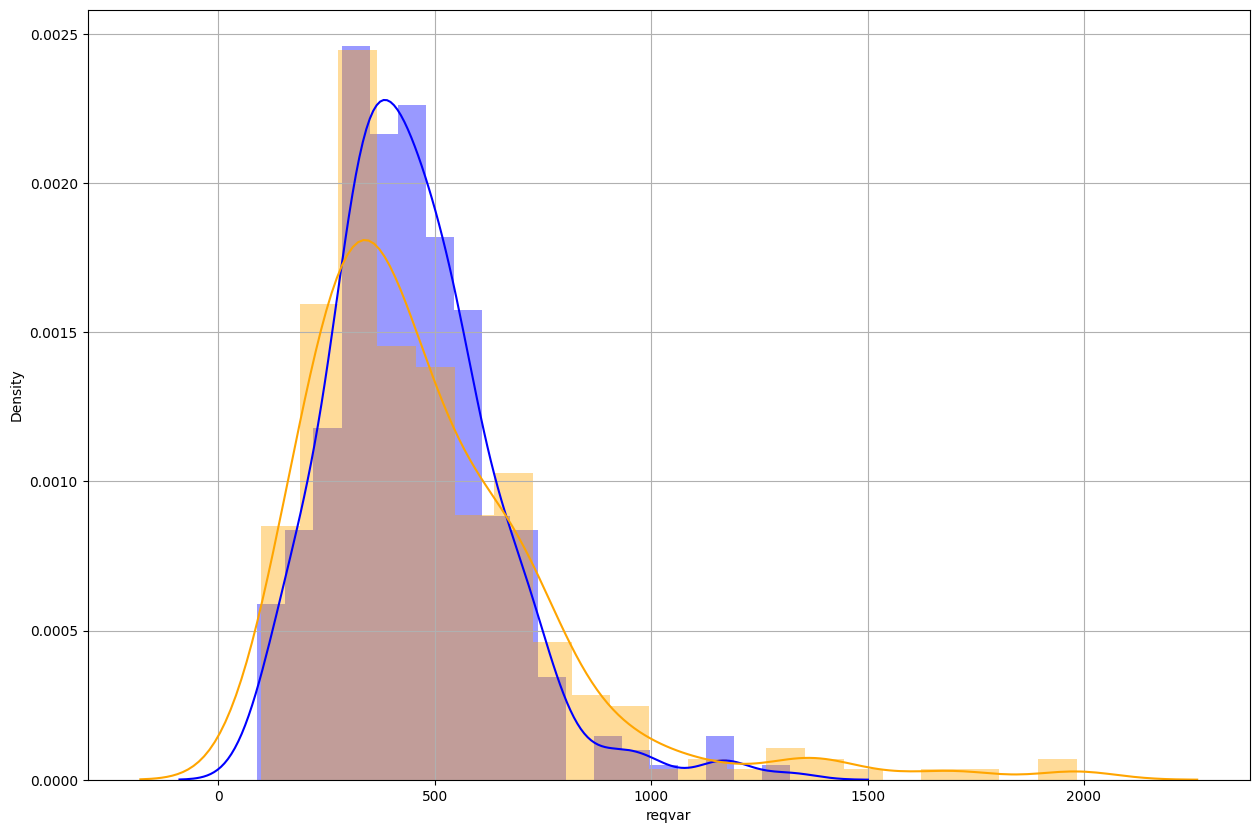

In [358]:
plt.figure(figsize=(15,10))
sns.distplot(y_pred,color="Blue")
sns.distplot(y_test,color="Orange")
plt.grid()
plt.show()

In [359]:
feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                importance
card                  0.11
card2items            0.10
carditems             0.08
multline              0.04
confer                0.04
...                    ...
card2tenurecat        0.00
owntv                 0.00
edcat                 0.00
inccat                0.00
tollfree              0.00

[91 rows x 1 columns]


In [360]:
#According to the mentioned importance, we can reduce the number of features to make the model better. Here, we remove features that have no or very little impact with regard to the model.

In [361]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


242.0238636395049


In [362]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [363]:
mape(y_test, y_pred)

0.3381147478398231

In [364]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

In [365]:
performance_metric(y_test, y_pred)

0.3147439197331582

## <a id='toc2_2_'></a>[Forward Selection](#toc0_)

In [366]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [367]:
forward_selection(final_df, catvars["reqvar"], significance_level=0.05)

['owntv',
 'carditems',
 'card2items',
 'lninc',
 'card',
 'card2',
 'income',
 'multline']

In [368]:
final_df = final_df[['owntv',
 'carditems',
 'card2items',
 'lninc',
 'card',
 'card2',
 'income',
 'multline']]

In [369]:
x_train, x_test, y_train, y_test= train_test_split(final_df,catvars["reqvar"],test_size=0.2,random_state=0)

In [370]:
model = xgboost.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

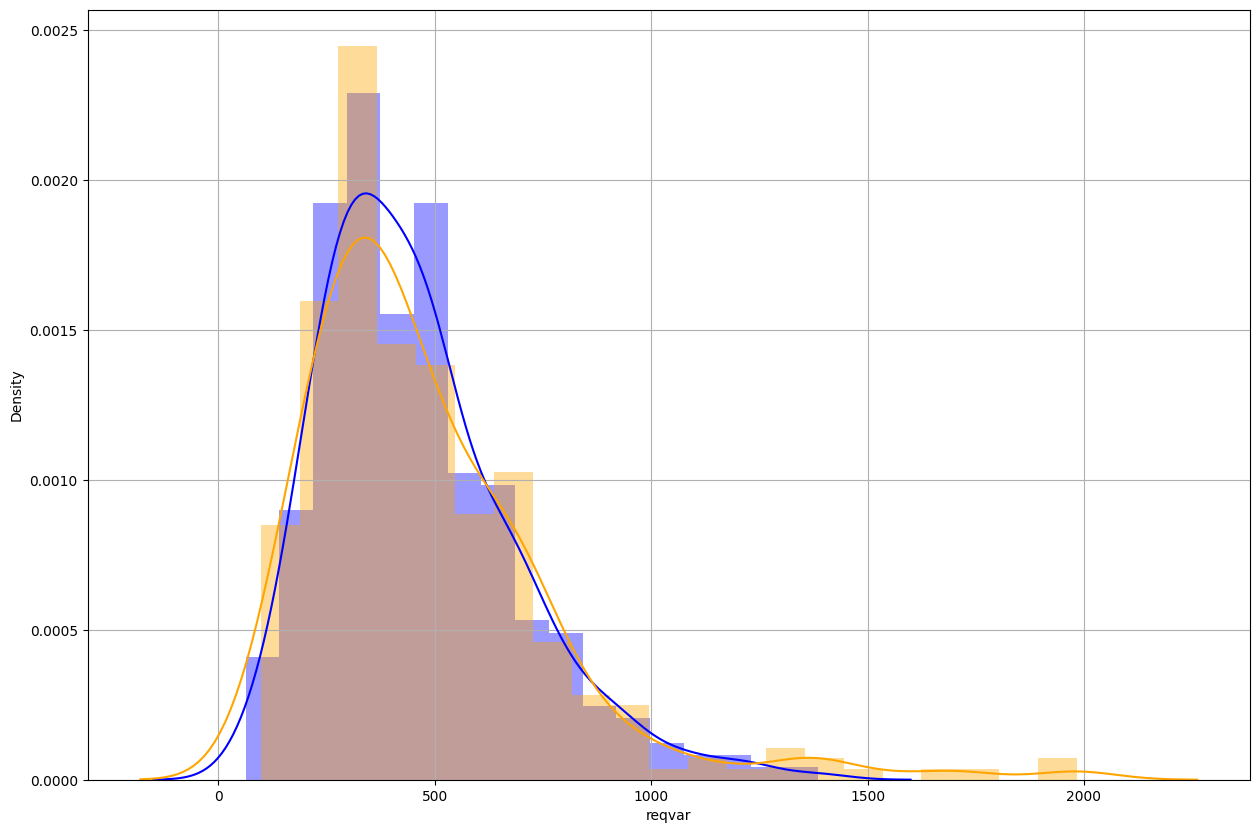

In [371]:
y_pred=model.predict(x_test)
plt.figure(figsize=(15,10))
sns.distplot(y_pred,color="Blue")
sns.distplot(y_test,color="Orange")
plt.grid()
plt.show()

# <a id='toc3_'></a>[AUTO ML](#toc0_)

## <a id='toc3_1_'></a>[Lazy Predictor](#toc0_)

In [372]:
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
### importing breast Cancer Dataset from sklearn
from sklearn.datasets import load_breast_cancer
### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split

In [373]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)


In [374]:
### fitting data in LazyClassifier
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

 76%|███████▌  | 32/42 [00:08<00:02,  4.55it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [00:11<00:00,  4.36it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 1253, number of used features: 7
[LightGBM] [Info] Start training from score 440.915395


100%|██████████| 42/42 [00:12<00:00,  3.46it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.46       0.48 211.77   
HistGradientBoostingRegressor                0.42       0.44 219.47   
LGBMRegressor                                0.42       0.44 219.53   
RandomForestRegressor                        0.42       0.43 219.89   
ExtraTreesRegressor                          0.41       0.43 221.63   
BaggingRegressor                             0.39       0.41 225.34   
KNeighborsRegressor                          0.39       0.40 226.05   
PoissonRegressor                             0.38       0.40 226.49   
SGDRegressor                                 0.38       0.40 226.86   
LassoLarsIC                                  0.38       0.40 226.91   
LarsCV                                       0.38       0.40 226.91   
Lars                                         0.38       0.40 226.91   
LassoL

In [375]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = gb_regressor.predict(x_test)

## <a id='toc3_2_'></a>[H20](#toc0_)

In [399]:
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.381-b09, mixed mode, sharing)
  Starting server from C:\Users\HP ELITEBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HPELIT~1\AppData\Local\Temp\tmpz_ubghjd
  JVM stdout: C:\Users\HPELIT~1\AppData\Local\Temp\tmpz_ubghjd\h2o_HP_ELITEBOOK_started_from_python.out
  JVM stderr: C:\Users\HPELIT~1\AppData\Local\Temp\tmpz_ubghjd\h2o_HP_ELITEBOOK_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_HP_ELITEBOOK_f6vqkn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [405]:
final_df_h2o_train =x_train.join(y_train)
final_df_h2o_test =x_test.join(y_test)

In [406]:
train_df = h2o.H2OFrame(final_df_h2o_train)
# Describe  the train h20Frame
test_df = h2o.H2OFrame(final_df_h2o_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [407]:
final_df_h2o_train.columns

Index(['owntv', 'carditems', 'card2items', 'lninc', 'card', 'card2', 'income',
       'multline', 'reqvar'],
      dtype='object')

In [408]:
x = train_df.columns
y = "reqvar"
x.remove(y)


In [410]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs = 600, max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train_df)

AutoML progress: |
23:14:35.407: AutoML: XGBoost is not available; skipping it.
23:14:35.471: _train param, Dropping bad and constant columns: [owntv]


23:14:36.53: _train param, Dropping bad and constant columns: [owntv]

█
23:14:37.62: _train param, Dropping bad and constant columns: [owntv]

██
23:14:38.637: _train param, Dropping bad and constant columns: [owntv]

█
23:14:39.348: _train param, Dropping bad and constant columns: [owntv]

█
23:14:39.957: _train param, Dropping bad and constant columns: [owntv]

██
23:14:40.650: _train param, Dropping bad and constant columns: [owntv]

██
23:14:42.444: _train param, Dropping bad and constant columns: [owntv]

███
23:14:42.915: _train param, Dropping bad and constant columns: [owntv]

███
23:14:44.661: _train param, Dropping unused columns: [owntv]
23:14:45.140: _train param, Dropping unused columns: [owntv]

████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),4/6
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [411]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230918_231435,183.649,33726.9,126.321,0.356329,33726.9
StackedEnsemble_BestOfFamily_1_AutoML_1_20230918_231435,184.851,34170.1,127.931,0.360619,34170.1
GBM_1_AutoML_1_20230918_231435,186.05,34614.8,129.314,0.3651,34614.8
GBM_2_AutoML_1_20230918_231435,188.588,35565.3,130.697,0.366622,35565.3
GBM_4_AutoML_1_20230918_231435,189.944,36078.5,132.067,0.375014,36078.5
GLM_1_AutoML_1_20230918_231435,189.997,36098.9,133.394,nan,36098.9
GBM_3_AutoML_1_20230918_231435,190.043,36116.4,131.551,0.371554,36116.4
GBM_5_AutoML_1_20230918_231435,190.252,36195.8,130.304,0.370047,36195.8
DeepLearning_1_AutoML_1_20230918_231435,190.416,36258.3,130.891,0.375615,36258.3
GBM_grid_1_AutoML_1_20230918_231435_model_1,194.281,37745.1,135.064,0.387499,37745.1


In [445]:
# Get the top model of leaderboard
preds = aml.leader.predict(test_df)


stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


In [448]:
y_true = h2o.H2OFrame(y_test.to_list())

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%


In [454]:
result = y_true.cbind(preds)
result = result.as_data_frame()



In [455]:
performance_metric(result['C1'], result['predict'])

0.4495115852896804

# <a id='toc4_'></a>[Conclusions concerning credit spend as derived from provided data:](#toc0_)
** The observed might be otherwise in case of outliers but is in coherence with majority ** 

- Non-Union members spend a little more than Union members
- Retired customers tend to spend less
- Credit spent on cards decreases with increase in number of years of service with the same employer
- Customers with "High" Debt to income ratio (%) spent a lot less as compared to those with "low" Debt to income ratio (%)
- Customers with low credit card debt spent more as compared to those with high debt
- Customers with 13-17 years of education spend more on their credit cards as compared to those with less or more years of education
- Customers with less number of people in household tend to spend more, specially customers who were alone
- Customer with less number of cars tend to spend more
- Customers who were not being charged card fee were found to be spending more
- Customers who did not receive any product offers spend more as compared to those who received offers


** Factors that do not influence credit spend except in case of outliers:

- Income of the individual
- Job category of the individual
- Marital status of customers
- Political views (except highly conservative people who were found spending slightly less than others)
- Birth month